In [2]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [3]:
train_data = pd.read_csv('process_data/train_data_v1.csv', sep=' ')
testA_data = pd.read_csv('process_data/testA_data_v1.csv', sep=' ')
testB_data = pd.read_csv('process_data/testB_data_v1.csv', sep=' ')
print(train_data.shape)
print(testA_data.shape)
print(testB_data.shape)

(149999, 37)
(50000, 37)
(50000, 37)


In [4]:
train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_13,v_14,regDates,creatDates,regDate_year,regDate_month,regDate_day,creatDate_year,creatDate_month,creatDate_day
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.795292,0.914762,2004-04-02,2016-04-04,2004,4,2,2016,4,4
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,-1.722674,0.245522,2003-03-01,2016-03-09,2003,3,1,2016,3,9
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,-0.832687,-0.229963,2004-04-03,2016-04-02,2004,4,3,2016,4,2
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,-2.438353,-0.478699,1996-09-08,2016-03-12,1996,9,8,2016,3,12
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,2.834518,1.923482,2012-01-03,2016-03-13,2012,1,3,2016,3,13


In [5]:
train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_11,v_12,v_13,v_14,regDate_year,regDate_month,regDate_day,creatDate_year,creatDate_month,creatDate_day
count,149999.000000,149999.000000,1.499990e+05,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,...,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000
mean,74999.493837,68349.371202,2.003417e+07,47.128581,8.052727,1.738525,0.354096,0.215975,116.861752,12.597144,...,0.009033,0.004852,0.000310,-0.000680,2003.357196,5.998393,6.502863,2015.999880,3.161581,15.833826
std,43301.558800,61104.030497,5.364999e+04,49.536165,7.864982,1.760784,0.539748,0.411498,70.074840,3.919584,...,3.286082,2.517441,1.288991,1.038683,5.362246,3.521590,3.450316,0.010954,0.380710,9.132285
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,-5.558207,-9.639552,-4.153899,-6.546556,1991.000000,1.000000,1.000000,2015.000000,1.000000,1.000000
25%,37499.500000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,-1.951544,-1.871843,-1.057799,-0.437031,1999.000000,3.000000,4.000000,2016.000000,3.000000,8.000000
50%,74999.000000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,-0.358061,-0.130728,-0.036257,0.141248,2003.000000,6.000000,7.000000,2016.000000,3.000000,16.000000
75%,112499.500000,118841.500000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,1.255046,1.776937,0.942820,0.680379,2007.000000,9.000000,9.000000,2016.000000,3.000000,24.000000
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,600.000000,15.000000,...,18.819042,13.847792,11.147669,8.658418,2015.000000,12.000000,12.000000,2016.000000,12.000000,31.000000


In [6]:
numerical_cols = train_data.select_dtypes(exclude='object').columns
numerical_cols

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14',
       'regDate_year', 'regDate_month', 'regDate_day', 'creatDate_year',
       'creatDate_month', 'creatDate_day'],
      dtype='object')

In [7]:
feature_cols = [x for x in train_data.columns if
                x not in ['SaleID', 'name', 'regDates', 'creatDates', 'price', 'model', 'brand', 'regionCode',
                          'creatDate']]
feature_cols

['regDate',
 'bodyType',
 'fuelType',
 'gearbox',
 'power',
 'kilometer',
 'notRepairedDamage',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'regDate_year',
 'regDate_month',
 'regDate_day',
 'creatDate_year',
 'creatDate_month',
 'creatDate_day']

In [8]:
train_X = train_data[feature_cols]
train_Y = train_data['price']

In [9]:
print('X train shape:', train_X.shape)
print('Y train shape:', train_Y.shape)

X train shape: (149999, 28)
Y train shape: (149999,)


In [10]:
x_train, x_val, y_train, y_val = train_test_split(train_X, train_Y, test_size=0.2)

In [11]:
# 线性回归
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(x_train, y_train)
pred1 = model1.predict(x_val)
mae1 = mean_absolute_error(np.exp(y_val), np.exp(pred1))
print('mae1:', mae1)


mae1: 924.5998022509702


In [12]:
joblib.dump(model1, 'models/model1.pkl')

['models/model1.pkl']

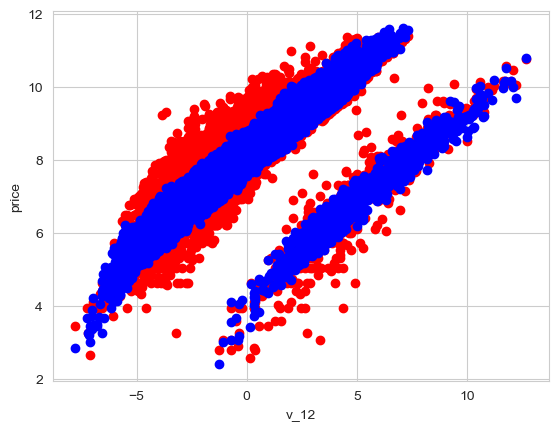

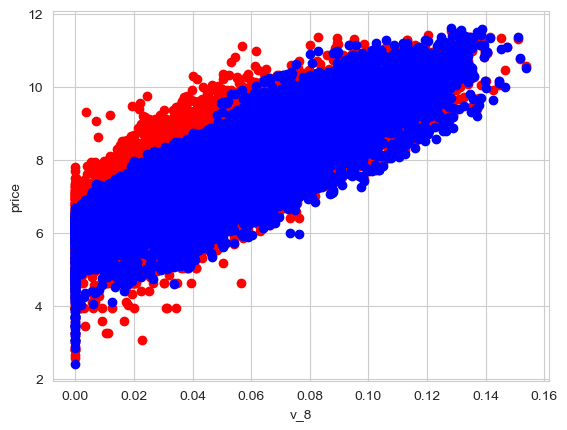

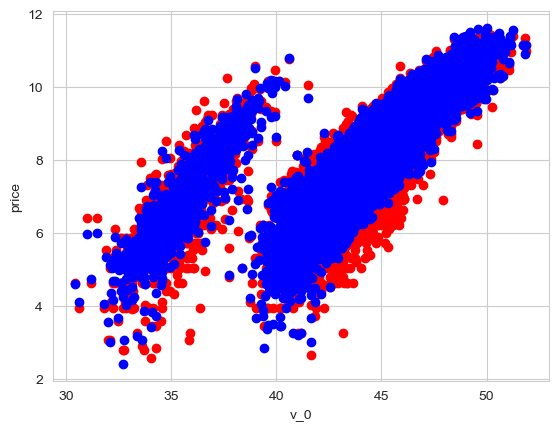

In [13]:
for i in ['v_12', 'v_8', 'v_0']:
    plt.scatter(x_val[i], y_val, color='red')
    plt.scatter(x_val[i], pred1, color='blue')
    plt.xlabel(i)
    plt.ylabel('price')
    plt.show()

In [14]:
# 随机森林
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(n_estimators=100)
model2.fit(x_train, y_train)
pred2 = model2.predict(x_val)
mae2 = mean_absolute_error(np.exp(y_val), np.exp(pred2))
print('mae2:', mae2)

mae2: 601.1484641846079


In [15]:
# 保存模型
joblib.dump(model2, 'models/model2.pkl')

['models/model2.pkl']

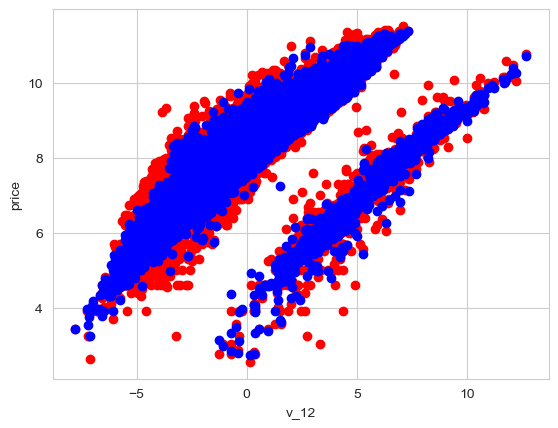

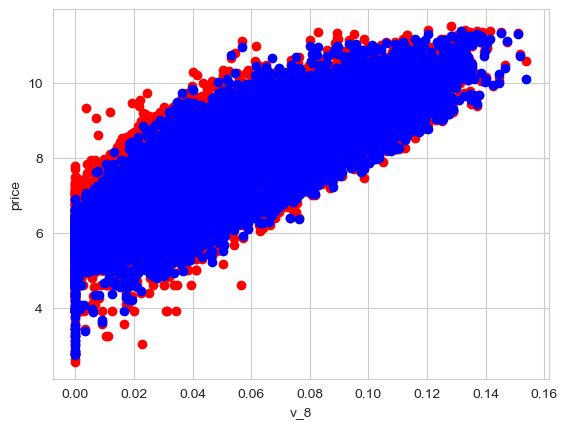

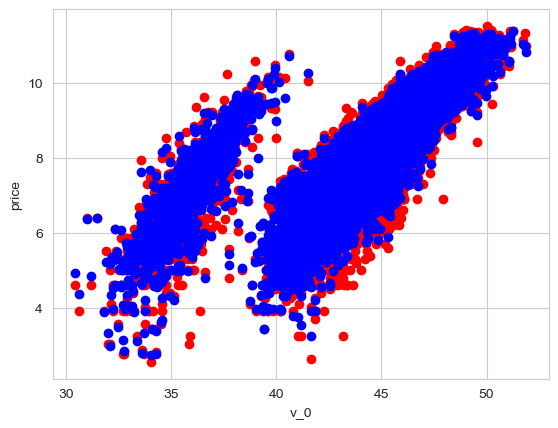

In [16]:
for i in ['v_12', 'v_8', 'v_0']:
    plt.scatter(x_val[i], y_val, color='red')
    plt.scatter(x_val[i], pred2, color='blue')
    plt.xlabel(i)
    plt.ylabel('price')
    plt.show()

In [17]:
# 决策树
from sklearn.tree import DecisionTreeRegressor

model3 = DecisionTreeRegressor()
model3.fit(x_train, y_train)
pred3 = model3.predict(x_val)
mae3 = mean_absolute_error(np.exp(y_val), np.exp(pred3))
print('mae3:', mae3)

mae3: 886.2004333333333


In [18]:
joblib.dump(model3, 'models/model3.pkl')

['models/model3.pkl']

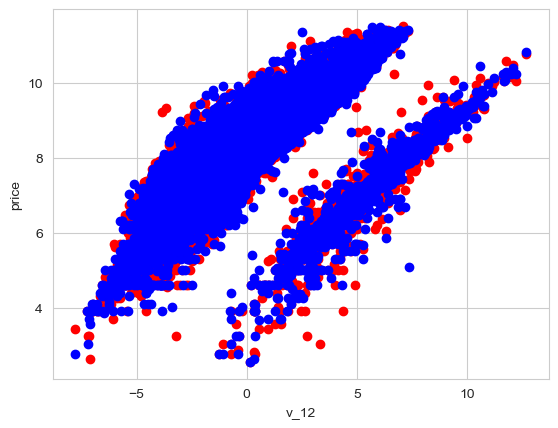

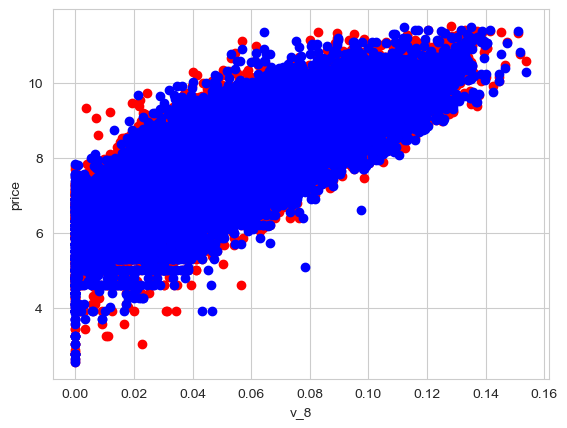

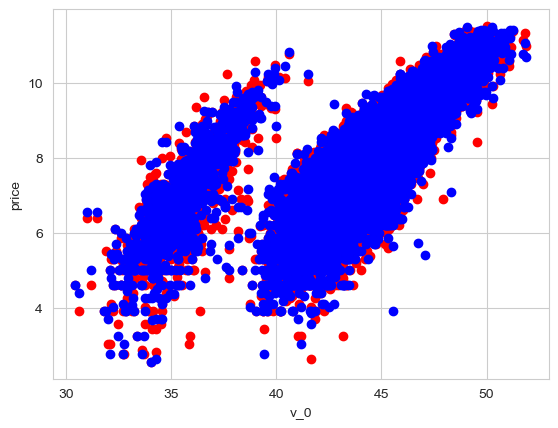

In [19]:
for i in ['v_12', 'v_8', 'v_0']:
    plt.scatter(x_val[i], y_val, color='red')
    plt.scatter(x_val[i], pred3, color='blue')
    plt.xlabel(i)
    plt.ylabel('price')
    plt.show()

In [20]:
# 使用随机森林模型对测试集A进行预测
testA_X = testA_data[feature_cols]
predA = model2.predict(testA_X)

testA_data['price'] = np.expm1(predA)
testA_data[['SaleID', 'price']].to_csv('data/used_car_submitA.csv', index=False)

# 使用随机森林模型对测试集B进行预测
testB_X = testB_data[feature_cols]
predB = model2.predict(testB_X)

testB_data['price'] = np.expm1(predB)
testB_data[['SaleID', 'price']].to_csv('data/used_car_submitB.csv', index=False)

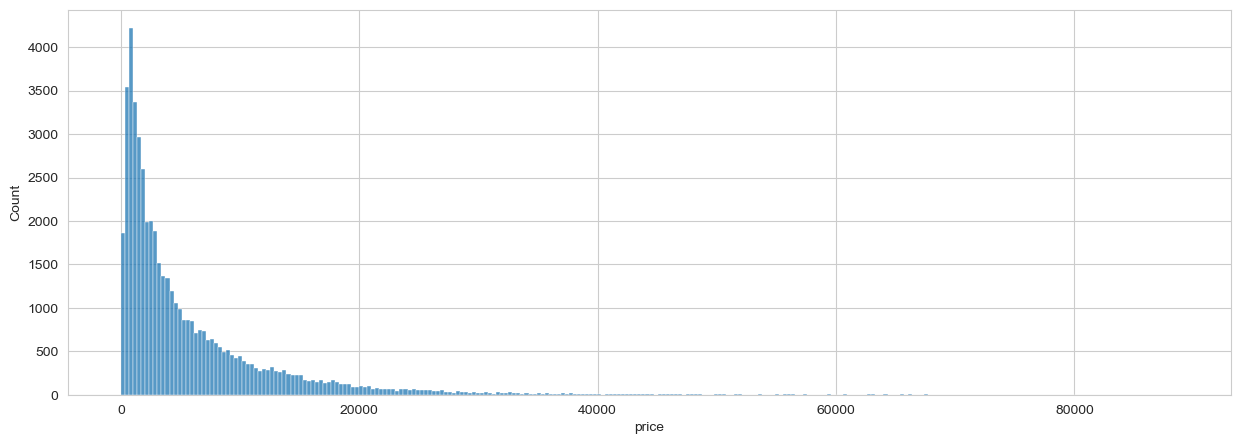

In [21]:
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.histplot(testA_data['price'])

plt.show()

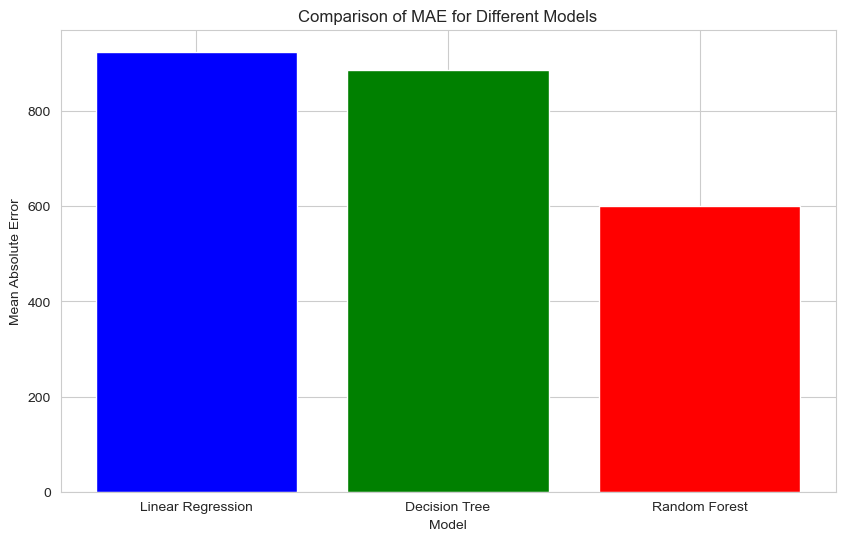

In [24]:
# mse 对比
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mae_values = [mae1, mae3, mae2]

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.title('Comparison of MAE for Different Models')
plt.show()

In [23]:
1 - mae2 / mae1

0.34982847419922536